# ChipWizard


```
Copyright 2023 Integrated Circuits Design and Training Laboratory @ TUBITAK BILGEM
SPDX-License-Identifier: Apache-2.0
```

|Name|Affiliation|IEEE Member|SSCS Member|
|:--:|:----------:|:----------:|:----------:|
|Onur Karataş  <br />  Email: onur.karatas@tubitak.gov.tr|[TUTEL](https://tutel.bilgem.tubitak.gov.tr/en/), [TUBITAK BILGEM](https://bilgem.tubitak.gov.tr/en), TURKEY|No|No|

## Overview
The process of designing a custom chip involves several steps, including RTL production, synthesis, placement and routing, and layout production. The open-source Chipyard framework simplifies the process of RTL production, while Openlane streamlines the process of layout production.

RTL production with Chipyard involves defining the circuit functionality and creating a hardware description in a high-level language such as Chisel. Once the RTL code is written, it is simulated and tested using Chipyard's simulation infrastructure.

The next step involves synthesis, where the RTL code is converted into a gate-level netlist. This netlist is then passed to Openlane, which automates the placement and routing process. Openlane generates a floorplan for the design and places the gates accordingly, taking into account the size and location of the chip. Once the gates are placed, Openlane generates the routing solution, which determines the connections between the gates. This process involves selecting the most efficient routing path to minimize signal delays and optimize the chip's performance.

In conclusion ChipWizard, the combination of Chipyard and Openlane simplifies the process of designing a custom chip, making it usable on a notebook.


In [ ]:
#@title Install Dependencies {display-mode: "form"}
import os
import pathlib

!sudo apt update
!sudo apt install device-tree-compiler

!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
!CI=0 bin/micromamba install --yes --prefix $CONDA_PREFIX \
                     --channel litex-hub \
                     --channel main \
                     openlane=2023.03.01_0_ge10820ec  \
                     open_pdks.sky130a=1.0.403_0_g12df12e
                     
!python -m pip install gdstk gdstk

%env CONDA_PREFIX={CONDA_PREFIX}

SoC             = "SolidRocketConfig" 
PDK             = 'sky130A'
PDK_ROOT        = '/content/conda-env/share/pdk'
CONDA_FORGE     = '/root/mambaforge'
RISCV           = '/content/chipyard/.conda-env/riscv-tools'
CHIPYARD        = '/content/chipyard'
HAMMER_HOME     = '/content/chipyard/vlsi/hammer'
PATH_BASE       = '/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin'

%env SoC={SoC}
%env PDK={PDK}
%env PDK_ROOT={PDK_ROOT}
%env CONDA_FORGE={CONDA_FORGE}
%env LD_LIBRARY_PATH={CONDA_FORGE}/lib:{LD_LIBRARY_PATH}
%env RISCV={RISCV}
%env CHIPYARD={CHIPYARD}
%env HAMMER_HOME={HAMMER_HOME}
%env HAMMER_VLSI={HAMMER_HOME}/src/hammer-vlsi
%env PYTHONPATH={CONDA_FORGE}:{HAMMER_HOME}/src:{HAMMER_HOME}/src/jsonschema:{HAMMER_HOME}/src/python-jsonschema-objects:{HAMMER_HOME}/src/hammer-tech:{HAMMER_HOME}/src/hammer-vlsi
%env MYPYPATH={CONDA_FORGE}:{HAMMER_HOME}/src:{HAMMER_HOME}/src/jsonschema:{HAMMER_HOME}/src/python-jsonschema-objects:{HAMMER_HOME}/src/hammer-tech:{HAMMER_HOME}/src/hammer-vlsi

%env PATH={CONDA_FORGE}/bin:{CONDA_FORGE}/condabin:{RISCV}/bin:{CHIPYARD}/bin:{CHIPYARD}/.conda-env/bin:{CHIPYARD}/software/firemarshal:{HAMMER_HOME}/src/hammer-shell:{PATH_BASE}

!curl -L -O "https://github.com/conda-forge/miniforge/releases/latest/download/Mambaforge-$(uname)-$(uname -m).sh" 
!bash Mambaforge-$(uname)-$(uname -m).sh -b

with open('environment.yml', 'w') as writefile:
    writefile.write("channels:        \n")
    writefile.write("  - litex-hub    \n")
    writefile.write("  - main         \n")
    writefile.write("  - conda-forge  \n")

!conda install -n base conda-lock -y
!mamba env update -n base -f environment.yml
!source activate base && conda env list

%cd /content/conda-env/share/pdk
!git clone https://github.com/VLSIDA/sky130_sram_macros.git

%cd /content
!git clone https://github.com/ucb-bar/chipyard.git
%cd /content/chipyard
!git checkout 1.8.1

!./build-setup.sh riscv-tools

!source activate /content/chipyard/.conda-env && conda env list

%cd /content/chipyard/vlsi



Görüntülenen çıkış son 5000 satıra kısaltıldı.












































































































































































Preparing transaction: / - \ done
Verifying transaction: / - \ | / - done
Executing transaction: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
#
# To activate this environment, use
#
#     $ conda activate base
#
# To deactivate an active environment, use
#
#     $ conda deactivate

# conda environments:
#
                         /content/conda-env
base                  *  /root/mambaforge

/content/conda-env/share/pdk
Cloning into 'sky130_sram_macros'...
remote: Enumerating objects: 780, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 780 (delta 63), reused 63 (delta 54), pack-reused 692
Receiving objects: 100% 

## RTL Generation with Chipyard

[Chipyard](https://chipyard.readthedocs.io/en/stable/) is a framework for designing and evaluating full-system hardware using agile teams. It is composed of a collection of tools and libraries designed to provide an integration between open-source and commercial tools for the development of systems-on-chip. 

![img](https://chipyard.readthedocs.io/en/stable/_images/chipyard-logo.svg)


##**SolidRocket:**

The SolidRocket configuration was specifically designed for use in this project and features the Rocket core with a 4KB L1 cache, TileLink interconnect, debug interface, and UART.

**Microarchitecture:** The Rocket core uses a 5-stage pipeline with a separate instruction fetch and data memory access stage. 

**Instruction Set Architecture:** The core is based on the open-source RISC-V ISA and includes support for the RV64IMAFDC instruction set extensions.

**Cache Hierarchy:** The core includes a one-level cache hierarchy, with separate instruction and data caches. The L1 cache is 4KB in size.

**Performance:** The Rocket core can achieve a clock frequency of 33.33MHz with SKY130 proceess node and a peak performance of up to 4.61 CoreMark/MHz.

**Fabric Integration:** The core can be integrated with on-chip interconnect TileLink.

**Verification:** The Rocket core has undergone extensive verification through the use of industry-standard tools such as UVM and formal verification techniques.

**License:** The Rocket core is released under the Berkeley Software Distribution (BSD) license, making it open-source and freely available for use and modification.

Note: This is not an exhaustive list of features and specifications, and there may be others that are not included here.

In [ ]:
#@title Create SoC Configurations {display-mode: "form"}
#------------------------------------------------#
#                      SoC                       #
#------------------------------------------------#
%%writefile /content/chipyard/generators/chipyard/src/main/scala/config/RocketConfigs.scala

package chipyard

import freechips.rocketchip.config.{Config}
import freechips.rocketchip.diplomacy.{AsynchronousCrossing}

// --------------
// Rocket Configs
// --------------
class SolidRocketConfig extends Config(
  new chipyard.config.WithBootROM ++
  new freechips.rocketchip.subsystem.WithL1ICacheSets(2) ++  // change rocket I$
  new freechips.rocketchip.subsystem.WithL1ICacheWays(1) ++    // change rocket I$
  new freechips.rocketchip.subsystem.WithL1DCacheSets(2) ++  // change rocket D$
  new freechips.rocketchip.subsystem.WithL1DCacheWays(1) ++    // change rocket D$
  new testchipip.WithSerialPBusMem ++
  new chipyard.config.WithL2TLBs(0) ++
  new freechips.rocketchip.subsystem.WithNBanks(0) ++
  new freechips.rocketchip.subsystem.WithNoMemPort ++          // remove offchip mem port
  new freechips.rocketchip.subsystem.WithScratchpadsOnly ++    // use rocket l1 DCache scratchpad as base phys mem
  new freechips.rocketchip.subsystem.WithNBigCores(1) ++
  new chipyard.config.AbstractConfig)


Overwriting /content/chipyard/generators/chipyard/src/main/scala/config/RocketConfigs.scala


In [ ]:
#@title Create Flow Configurations {display-mode: "form"}
%%writefile /content/chipyard/vlsi/tutorial.mk

tutorial ?= none

ifeq ($(tutorial), SolidRocketConfig)
    tech_name         ?= sky130
    CONFIG            ?= SolidRocketConfig
    TOOLS_CONF        ?= example-openroad.yml
    TECH_CONF         ?= example-sky130.yml
    DESIGN_CONF       ?= example-designs/sky130-openroad.yml
    EXTRA_CONFS       ?= $(if $(filter $(VLSI_TOP),Rocket), example-designs/sky130-rocket.yml, )
    INPUT_CONFS       ?= $(TOOLS_CONF) $(TECH_CONF) $(DESIGN_CONF) $(EXTRA_CONFS) 
    VLSI_OBJ_DIR      ?= build-sky130-openroad
endif                                                                                    

Overwriting /content/chipyard/vlsi/tutorial.mk


In [ ]:
#@title Create PDK Configurations {display-mode: "form"}
%%writefile /content/chipyard/vlsi/example-sky130.yml

# Technology Setup
# Technology used is Sky130
vlsi.core.technology: sky130

vlsi.core.max_threads: 12

# Technology paths
technology.sky130:
  sky130A: "/content/conda-env/share/pdk/sky130A"
  openram_lib: "/content/conda-env/share/pdk/sky130_sram_macros" 
  

Overwriting /content/chipyard/vlsi/example-sky130.yml


In [ ]:
#@title Build RTL Files {display-mode: "form"}
!make buildfile tutorial={SoC}

Görüntülenen çıkış son 5000 satıra kısaltıldı.

  | => hwacha / Compile / compileIncremental 9s
  | => rocket-dsp-utils / Compile / compileIncremental 13s
  | => sifive_blocks / Compile / compileIncremental 20s
  | => sodor / Compile / compileIncremental 20s
[warn] /content/chipyard/generators/sifive-blocks/src/main/scala/devices/chiplink/Partial.scala:45:16: method fire in class AddMethodsToReadyValid is deprecated (since Chisel 3.5): Calling this function with an empty argument list is invalid in Scala 3. Use the form without parentheses instead

  | => hwacha / Compile / compileIncremental 9s
  | => rocket-dsp-utils / Compile / compileIncremental 13s
  | => sifive_blocks / Compile / compileIncremental 20s
  | => sodor / Compile / compileIncremental 20s
[warn]     when (io.i.fire()) {

  | => hwacha / Compile / compileIncremental 9s
  | => rocket-dsp-utils / Compile / compileIncremental 13s
  | => sifive_blocks / Compile / compileIncremental 20s
  | => sodor / Compile / compileIncrem

In [ ]:
#@title Create SoC Wrapper {display-mode: "form"}
%%writefile /content/chipyard/vlsi/generated-src/chipyard.TestHarness.SolidRocketConfig/SoC_wrapper.v

module SoC_wrapper (
`ifdef USE_POWER_PINS
    inout vccd1,  // User area 1 1.8V supply
    inout vssd1,	  // User area 1 digital ground
`endif
    input         jtag_TCK,
    input         jtag_TMS,
    input         jtag_TDI,
    output        jtag_TDO,
    output        serial_tl_bits_in_ready,
    input         serial_tl_bits_in_valid,
    input  [31:0] serial_tl_bits_in_bits,
    input         serial_tl_bits_out_ready,
    output        serial_tl_bits_out_valid,
    output [31:0] serial_tl_bits_out_bits,
    input         custom_boot,
    input         clock_clock,
    input         reset,
    output        uart_0_txd,
    input         uart_0_rxd
);

wire serial_tl_clock;

ChipTop SoC (
  .jtag_TCK(jtag_TCK), 
  .jtag_TMS(jtag_TMS),             
  .jtag_TDI(jtag_TDI),
  .jtag_TDO(jtag_TDO),

  .serial_tl_clock         (serial_tl_clock         ),
  .serial_tl_bits_in_ready (serial_tl_bits_in_ready ),
  .serial_tl_bits_in_valid (serial_tl_bits_in_valid ),
  .serial_tl_bits_in_bits  (serial_tl_bits_in_bits  ),
  .serial_tl_bits_out_ready(serial_tl_bits_out_ready),
  .serial_tl_bits_out_valid(serial_tl_bits_out_valid),
  .serial_tl_bits_out_bits (serial_tl_bits_out_bits ),

  .custom_boot             (custom_boot             ),
  .clock_clock             (clock_clock             ),
  .reset                   (reset                   ),

  .uart_0_txd              (uart_0_txd              ),
  .uart_0_rxd              (uart_0_rxd              )
);

endmodule


Writing /content/chipyard/vlsi/generated-src/chipyard.TestHarness.SolidRocketConfig/SoC_wrapper.v


## OpenLane Flow with SKY130 PDK

[OpenLane](https://openlane.readthedocs.io/en/latest/) is an automated [RTL](https://en.wikipedia.org/wiki/Register-transfer_level) to [GDSII](https://en.wikipedia.org/wiki/GDSII) flow based on several components including [OpenROAD](https://theopenroadproject.org/), [Yosys](https://yosyshq.net/yosys/), [Magic](http://www.opencircuitdesign.com/magic/), [Netgen](http://opencircuitdesign.com/netgen/) and custom methodology scripts for design exploration and optimization targeting [open source PDKs](https://github.com/google/open-source-pdks).

![img](https://openlane.readthedocs.io/en/latest/_images/flow_v1.png)

In [ ]:
#@title Switch to OpenLane Environment {display-mode: "form"}
%cd /content
!source activate /content/conda-env && conda env list
%env PATH={CONDA_PREFIX}/bin:{CHIPYARD}/bin:{CHIPYARD}/.conda-env/bin:{CHIPYARD}/software/firemarshal:{HAMMER_HOME}/src/hammer-shell:{PATH_BASE}

/content
# conda environments:
#
                         /content/chipyard/.conda-env
                      *  /content/conda-env
base                     /root/mambaforge

env: PATH=/content/conda-env/bin:/content/chipyard/bin:/content/chipyard/.conda-env/bin:/content/chipyard/software/firemarshal:/content/chipyard/vlsi/hammer/src/hammer-shell:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [ ]:
#@title Create Config TCL {display-mode: "form"}
%%writefile /content/config.tcl
##-------------------------------------------------------------------##
##                         Required Variables                        ##
##-------------------------------------------------------------------## 
set ::env(DESIGN_NAME) 	             {SoC_wrapper}
set ::env(CLOCK_PERIOD)              {30}
set ::env(CLOCK_NET)                 {SoC.clock_clock}
set ::env(CLOCK_PORT)                {clock_clock}

set ::env(VERILOG_FILES) "\
   $::env(CHIPYARD)/vlsi/generated-src/chipyard.TestHarness.SolidRocketConfig/SoC_wrapper.v \
   $::env(CHIPYARD)/vlsi/generated-src/chipyard.TestHarness.SolidRocketConfig/chipyard.TestHarness.SolidRocketConfig.top.v \
   $::env(CHIPYARD)/vlsi/generated-src/chipyard.TestHarness.SolidRocketConfig/chipyard.TestHarness.SolidRocketConfig.top.mems.v \
   $::env(CHIPYARD)/vlsi/generated-src/chipyard.TestHarness.SolidRocketConfig/EICG_wrapper.v \	
   $::env(CHIPYARD)/vlsi/generated-src/chipyard.TestHarness.SolidRocketConfig/IOCell.v \	
   $::env(CHIPYARD)/vlsi/generated-src/chipyard.TestHarness.SolidRocketConfig/plusarg_reader.v \	
   $::env(CHIPYARD)/vlsi/generated-src/chipyard.TestHarness.SolidRocketConfig/ClockDividerN.sv"	
	
set ::env(VERILOG_FILES_BLACKBOX) "$::env(PDK_ROOT)/sky130_sram_macros/sky130_sram_1kbyte_1rw1r_32x256_8/sky130_sram_1kbyte_1rw1r_32x256_8.v"
set ::env(EXTRA_LIBS)             "$::env(PDK_ROOT)/sky130_sram_macros/sky130_sram_1kbyte_1rw1r_32x256_8/sky130_sram_1kbyte_1rw1r_32x256_8_TT_1p8V_25C.lib"
set ::env(EXTRA_LEFS)             "$::env(PDK_ROOT)/sky130_sram_macros/sky130_sram_1kbyte_1rw1r_32x256_8/sky130_sram_1kbyte_1rw1r_32x256_8.lef"
set ::env(EXTRA_GDS_FILES)        "$::env(PDK_ROOT)/sky130_sram_macros/sky130_sram_1kbyte_1rw1r_32x256_8/sky130_sram_1kbyte_1rw1r_32x256_8.gds"

set ::env(FP_PDN_MACRO_HOOKS) "\
	SoC.system.tile_prci_domain.tile_reset_domain.tile.frontend.icache.tag_array.tag_array_ext.mem_0_0 vccd1 vssd1 vccd1 vssd1, \
  SoC.system.tile_prci_domain.tile_reset_domain.tile.frontend.icache.data_arrays_0.data_arrays_0_0_ext.mem_0_0 vccd1 vssd1 vccd1 vssd1, \
  SoC.system.tile_prci_domain.tile_reset_domain.tile.frontend.icache.data_arrays_1.data_arrays_0_0_ext.mem_0_0 vccd1 vssd1 vccd1 vssd1, \
  SoC.system.tile_prci_domain.tile_reset_domain.tile.dcache.data.data_arrays_0.data_arrays_0_ext.mem_0_0 vccd1 vssd1 vccd1 vssd1, \
  SoC.system.tile_prci_domain.tile_reset_domain.tile.dcache.data.data_arrays_0.data_arrays_0_ext.mem_0_1 vccd1 vssd1 vccd1 vssd1"

set ::env(MACRO_PLACEMENT_CFG)	"/content/macro.cfg"

##-------------------------------------------------------------------##
##                             Synthesis                             ##
##-------------------------------------------------------------------## 
set ::env(SYNTH_STRATEGY)            {AREA 0};    ## Default: AREA 0
set ::env(SYNTH_MAX_FANOUT)          {10};        ## Default: 5
set ::env(SYNTH_FLAT_TOP)            {1};         ## Default: 0
set ::env(SYNTH_READ_BLACKBOX_LIB)   {1};         ## Default: 0
set ::env(SYNTH_CLOCK_UNCERTAINTY)   {0.08};      ## Default: 0.25
set ::env(SYNTH_USE_PG_PINS_DEFINES) {USE_POWER_PINS};
set ::env(VDD_NETS)                  {vccd1};
set ::env(GND_NETS)                  {vssd1};
set ::env(VDD_PIN)                   {vccd1};
set ::env(GND_PIN)                   {vssd1};
##-------------------------------------------------------------------##
##                           Floorplanning                           ##
##-------------------------------------------------------------------##
set ::env(FP_SIZING)           {absolute};      ##Default: relative
set ::env(DIE_AREA)            {0 0 3200 3200}; ## x0 y0 x1 y1
set ::env(DESIGN_IS_CORE)      {1};             ##Default: 1
set ::env(FP_IO_MIN_DISTANCE)  {3};             ##Default: 3
set ::env(FP_PDN_CHECK_NODES)  {0};             ##Default: 1
set ::env(FP_PDN_ENABLE_RAILS) {1};             ##Default: 1
set ::env(FP_PDN_CORE_RING)    {0};             ##Default: 0
set ::env(FP_IO_VLENGTH)       {1};             ##Default: 4
set ::env(FP_IO_HLENGTH)       {1};             ##Default: 4
set ::env(FP_PDN_IRDROP)       {0};             ##Default: 1
##-------------------------------------------------------------------##
##                             Placement                             ##
##-------------------------------------------------------------------## 
set ::env(PL_TARGET_DENSITY)                   {0.20}; ##Default: 0.55
set ::env(PL_SKIP_INITIAL_PLACEMENT)           {1};    ##Default: 0
set ::env(PL_RESIZER_MAX_WIRE_LENGTH)          {200};  ##Default: 0
set ::env(PL_RESIZER_MAX_SLEW_MARGIN)          {50};   ##Default: 20
set ::env(PL_RESIZER_MAX_CAP_MARGIN)           {30};   ##Default: 20
set ::env(PL_RESIZER_HOLD_SLACK_MARGIN)        {0.3};  ##Default: 0.1
set ::env(PL_RESIZER_SETUP_SLACK_MARGIN)       {0.5};  ##Default: 0.05
set ::env(PL_RESIZER_HOLD_MAX_BUFFER_PERCENT)  {70};   ##Default: 50
set ::env(PL_RESIZER_SETUP_MAX_BUFFER_PERCENT) {50};   ##Default: 50
set ::env(PL_MAX_DISPLACEMENT_X)               {800};  ##Default: 500	
set ::env(PL_MAX_DISPLACEMENT_Y)               {800};  ##Default: 100	
##-------------------------------------------------------------------##
##                                CTS                                ##
##-------------------------------------------------------------------## 
set ::env(CLOCK_TREE_SYNTH)         {1};    ##Default: 1
set ::env(CTS_TARGET_SKEW)          {200};  ##Default: 200
set ::env(CTS_TOLERANCE)            {100};  ##Default: 100
set ::env(CTS_SINK_CLUSTERING_SIZE) {25};   ##Default: 25
set ::env(CTS_CLK_MAX_WIRE_LENGTH)  {300};  ##Default: 0
##-------------------------------------------------------------------##
##                              Routing                              ##
##-------------------------------------------------------------------## 
set ::env(RT_MAX_LAYER)                         {met5};
set ::env(ROUTING_CORES)                        {16};   ##Default: 2
set ::env(GRT_ALLOW_CONGESTION)                 {1};    ##Default: 0
set ::env(GLB_OVERFLOW_ITERS)                   {50};   ##Default: 50
set ::env(GLB_RESIZER_MAX_WIRE_LENGTH)          {0};    ##Default: 0
set ::env(GLB_RESIZER_MAX_SLEW_MARGIN)          {10};   ##Default: 10
set ::env(GLB_RESIZER_MAX_CAP_MARGIN)           {10};   ##Default: 10
set ::env(GLB_RESIZER_HOLD_SLACK_MARGIN)        {0.4};  ##Default: 0.1
set ::env(GLB_RESIZER_SETUP_SLACK_MARGIN)       {0.5};  ##Default: 0.05
set ::env(GLB_RESIZER_HOLD_MAX_BUFFER_PERCENT)  {70};   ##Default: 50
set ::env(GLB_RESIZER_SETUP_MAX_BUFFER_PERCENT) {50};   ##Default: 50
##-------------------------------------------------------------------##
##                           Flow Control                            ##
##-------------------------------------------------------------------## 
set ::env(LEC_ENABLE)               {0};      ##Default: 0
set ::env(RUN_DRT)                  {1};      ##Default: 1
set ::env(PRIMARY_SIGNOFF_TOOL)     {magic};  ##Default: magic
set ::env(RUN_MAGIC)                {1};      ##Default: 1
set ::env(RUN_MAGIC_DRC)            {0};      ##Default: 1
set ::env(RUN_KLAYOUT)              {1};      ##Default: 1
set ::env(RUN_KLAYOUT_DRC)          {1};      ##Default: 0
set ::env(RUN_KLAYOUT_XOR)          {0};      ##Default: 1
set ::env(KLAYOUT_XOR_GDS)          {0};      ##Default: 1
set ::env(KLAYOUT_XOR_XML)          {0};      ##Default: 1
set ::env(DIODE_INSERTION_STRATEGY) {4};      ##Default: 3
set ::env(RUN_CVC)                  {0};      ##Default: 1
set ::env(RUN_SPEF_EXTRACTION)      {0};      ##Default: 1
set ::env(MAGIC_WRITE_FULL_LEF)     {0};      ##Default: 1
##-------------------------------------------------------------------##
##                                END                                ##
##-------------------------------------------------------------------## 


Writing /content/config.tcl


In [ ]:
#@title Create Macro CFG {display-mode: "form"}
%%writefile /content/macro.cfg
SoC.system.tile_prci_domain.tile_reset_domain.tile.frontend.icache.tag_array.tag_array_ext.mem_0_0             200 200 N
SoC.system.tile_prci_domain.tile_reset_domain.tile.frontend.icache.data_arrays_0.data_arrays_0_0_ext.mem_0_0   200 1200 N 
SoC.system.tile_prci_domain.tile_reset_domain.tile.frontend.icache.data_arrays_1.data_arrays_0_0_ext.mem_0_0   200 2200 N
SoC.system.tile_prci_domain.tile_reset_domain.tile.dcache.data.data_arrays_0.data_arrays_0_ext.mem_0_0         2500 200 N 
SoC.system.tile_prci_domain.tile_reset_domain.tile.dcache.data.data_arrays_0.data_arrays_0_ext.mem_0_1         2500 1200 N 

Writing /content/macro.cfg


In [ ]:
#@title Start OpenLane Flow {display-mode: "form"}
!flow.tcl -design .

OpenLane 2023.03.01_0_ge10820ec-conda
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using configuration in 'config.tcl'...
[INFO]: PDK Root: /content/conda-env/share/pdk
[INFO]: Process Design Kit: sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library: sky130_fd_sc_hd
[INFO]: Run Directory: /content/runs/RUN_2023.04.02_02.29.59
[INFO]: Preparing LEF files for the nom corner...
[INFO]: Preparing LEF files for the min corner...
[INFO]: Preparing LEF files for the max corner...
[STEP 1]
[INFO]: Running Synthesis (log: runs/RUN_2023.04.02_02.29.59/logs/synthesis/1-synthesis.log)...
[STEP 2]
[INFO]: Running Single-Corner Static Timing Analysis (log: runs/RUN_2023.04.02_02.29.59/logs/synthesis/2-sta.log)...
[INFO]: Creating a netlist with power/ground pins.
[STEP 3]
[INFO]: Running Initial Floorplanning (log: runs/RUN_2023.04

**Layout**

Due to the large size of the SVG file, the layout could not be viewed directly in the notebook. Instead, the image of the layout was shared, which was taken from the realization of the same project on a local computer.

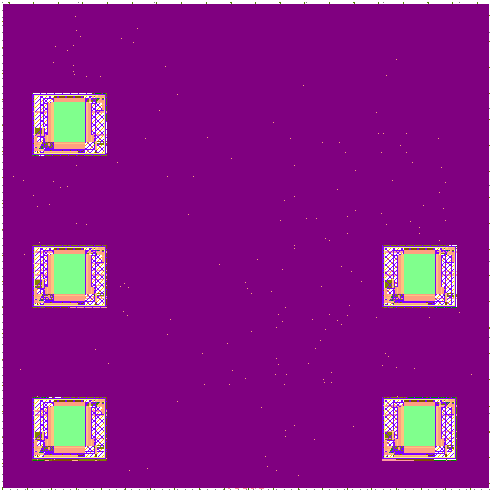

In [ ]:
#@title Metrics {display-mode: "form"}
import pandas as pd
import pathlib

pd.options.display.max_rows = None
reports = sorted(pathlib.Path('runs').glob('*/reports/metrics.csv'))
df = pd.read_csv(reports[-1])
df.transpose()

,0
design,/content
design_name,SoC_wrapper
config,RUN_2023.04.02_02.29.59
flow_status,flow completed
total_runtime,6h0m53s0ms
routed_runtime,3h48m2s0ms
(Cell/mm^2)/Core_Util,29676.171875
DIEAREA_mm^2,10.24
CellPer_mm^2,14838.085938
OpenDP_Util,17.59
